#### [Python] 이미지 주소를 이용하여 이미지 출력 및 저장
- 이미지 주소를 통해 이미지 다운 후 사용
    - `curl`
    - `urllib.request.urlretrieve`
- 이미지 주소를 통해 이미지 다운 없이 사용
    - `urllib.request.urlopen`
    - `request.get`

---


#### <u>curl</u>

python내부에서 직접 코드로 `curl`요청을 보내 이미지를 다운 받을 수 있다.

In [27]:
import os
import time
from PIL import Image

# 다운받을 이미지 url
url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAxODExMTZfMjE0%2FMDAxNTQyMzU4MDY1OTE3.mke0JLFBO4jS-hJojejDruHQmJkV7b4gKs3oRfn7tdIg.1LxHXj9zP7M09hPrht0iW17TRKkmCAgV6kEjTgPtPDcg.JPEG%2FI1P4kSElZvKVehuLxO8qMBSTUkIU.jpg&type=sc960_832"

# time check
start = time.time()

# curl 요청
# curl "이미지 주소" > "저장 될 이미지 파일 이름" 
os.system("curl " + url + " > test.jpg")

# 이미지 다운로드 시간 체크
print(time.time() - start)


# 저장 된 이미지 확인
curl_img = Image.open("./test.jpg")

0.0780174732208252


<br>

#### <u> urllib.request.urlretrieve </u>

`curl`과 마찬가지로 `urllib`라이브러리를 이용하여 이미지 주소를 통해 이미지를 외부에서 다운받을 수 있다.

In [34]:
import urllib.request
from PIL import Image

url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAxODExMTZfMjE0%2FMDAxNTQyMzU4MDY1OTE3.mke0JLFBO4jS-hJojejDruHQmJkV7b4gKs3oRfn7tdIg.1LxHXj9zP7M09hPrht0iW17TRKkmCAgV6kEjTgPtPDcg.JPEG%2FI1P4kSElZvKVehuLxO8qMBSTUkIU.jpg&type=sc960_832"

# time check
start = time.time()


# 다양한 오류로 인해 실행이 안되어 긴급하게 아래의 세 줄 코드를 추가하여 수행하였다.
# 기존에는 내가 사용하던 방식도 공부할 때 참조했던 블로그에서도
# urllib.request.urlretrieve(url, PATH)을 사용하였는데
# 해당 방식이 HTTP Error 403: Forbidden에서 한 번, 정규표현식에서 한 번
# 에러가 발생하여 아래의 방법을 수행하게 되었다.
# 왜 에러가 발생했는지에 관하여 좀더 알아봐야겠다.
class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"
    
urllib._urlopener = AppURLopener()

urllib._urlopener.retrieve(url, "test_2.jpg")

# 이미지 다운로드 시간 체크
print(time.time() - start)

# 저장 된 이미지 확인
urlretrieve_img = Image.open("test_2.jpg")

0.04400992393493652


C:\Users\jhryu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  


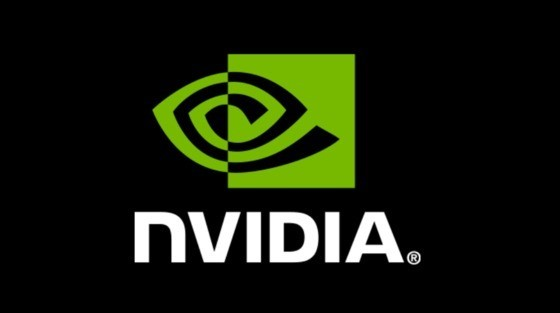

In [16]:
urlretrieve_img

<br>

#### <u>urllib.request.urlopen</u>

이미지 저장 없이 바로 사용하는 방법은 `urlopen`을 이용하면된다.

In [13]:
from PIL import Image
import urllib.request
import time
from io import BytesIO

url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAxODExMTZfMjE0%2FMDAxNTQyMzU4MDY1OTE3.mke0JLFBO4jS-hJojejDruHQmJkV7b4gKs3oRfn7tdIg.1LxHXj9zP7M09hPrht0iW17TRKkmCAgV6kEjTgPtPDcg.JPEG%2FI1P4kSElZvKVehuLxO8qMBSTUkIU.jpg&type=sc960_832"

# time check
start = time.time()

# request.urlopen()
# HTTP Error 403: Forbidden 에러 때문에 하단의 소스 한 줄을 추가해주었다.
req = urllib.request.Request(url, headers = {"User-Agent" : "Mozilla/5.0"})
res = request.urlopen(req).read()

# 이미지 다운로드 시간 체크
print(time.time() - start)


# Image open
urlopen_img = Image.open(BytesIO(res))

0.04500985145568848


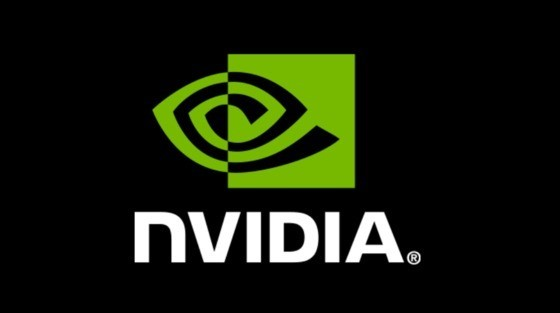

In [14]:
urlopen_img

<br>

#### <u>request.get</u>

이미지 저장 없이 바로 사용하는 방법의 또 다른 방법으로 `request.get`이 있다.

In [28]:
import requests
from io import BytesIO
from PIL import Image
import time

# 다운받을 이미지 url
url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAxODExMTZfMjE0%2FMDAxNTQyMzU4MDY1OTE3.mke0JLFBO4jS-hJojejDruHQmJkV7b4gKs3oRfn7tdIg.1LxHXj9zP7M09hPrht0iW17TRKkmCAgV6kEjTgPtPDcg.JPEG%2FI1P4kSElZvKVehuLxO8qMBSTUkIU.jpg&type=sc960_832"

# time check
start = time.time()

# request.get 요청
res = requests.get(url)

# 이미지 다운로드 시간 체크
print(time.time() - start)

#Img open
request_get_img = Image.open(BytesIO(res.content))

0.0400090217590332


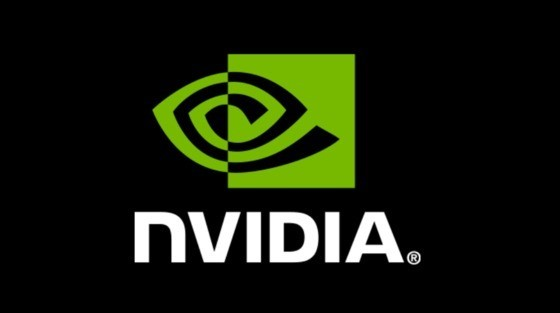

In [29]:
request_get_img

<br>

---

### References
- [https://soyoung-new-challenge.tistory.com/92](https://soyoung-new-challenge.tistory.com/92)